In [14]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt

# 2.7 ABCD Matrices

When light rays travel through an optical system (including lenses, mirrors, interfaces, and air gaps) the height and direction change in predictable ways.  Traditionally, each surface required its own formula, and analyzing multi-element systems is messy and error prone. ABCD matrices provide a simple, unified, and algebraically elegant way to model these systems, especially under the paraxial approximation, where rays make small angles with the optical axis.

A ray is characterized by its distance from the optical axis and direction.

![F1](ABCD1.jpg)

The paraxial approximation makes the optical system linear.  With the relationship between the input and output linear the relationship is given by

$y2=A*y1 +B*\theta 1$

$\theta 2=C*y1 + D*\theta 1$

This linear relationship can be constructed in matrix form as given by

$ \begin{bmatrix} y2 \\ \theta 2 \end{bmatrix} = \begin{bmatrix} A & B \\ C & D \end{bmatrix} \begin{bmatrix} y1 \\ \theta 1 \end{bmatrix}$

The matrix $M=\begin{bmatrix} A & B \\ C & D \end{bmatrix}$ characterizes the optical system.

**Free space propagation:** The ray travels in a straight line and the propagation angle does not change, resulting in

$$
y2=y1 + \theta 1*d\\
\theta 2=\theta 1,
$$
where $d$ is the propagation distance. Putting these equations into the form from above results in
$$
\begin{aligned}
y2=1*y1 + &d*\theta 1\\
\theta 2=0 +& 1*\theta 1
\end{aligned}
$$

So, the matrix is $\boxed{M=\begin{bmatrix} 1 & d \\ 0 & 1 \end{bmatrix}}$

**Thin Lens:** With a thin lens the ray direction changes but the position does not change.  

![F1](ABCD2.jpg)

The conjugate equation is

$\frac{1}{S1}+\frac{1}{S2}=\frac{1}{f}$

Relating the position to angles gives $\theta1=\frac{y1}{S1}$ and $\theta2=-\frac{y2}{S2}$.  Substituting the angle into the conjugate equation gives

$\frac{\theta 1}{y1}-\frac{\theta 2}{y1}=\frac{1}{f}$

$\frac{\theta 2}{y1} = \frac{\theta 1}{y1}-\frac{1}{f}$

$\theta 2 = \theta 1-\frac{y1}{f}$

Putting this equation into the form for the matrix gives

$$
\begin{aligned}
y2=1*y1 &+& 0\\
\theta 2=-\frac{1}{f}*y1 &+& 1*\theta 1,
\end{aligned}
$$
So, the matrix is $\boxed{M=\begin{bmatrix} 1 & 0 \\ -\frac{1}{f} & 1 \end{bmatrix}}$

**Using ABCD Matrices** 

The ABCD matrices relate the ray height and ray angle after progagating through the element.  Let's start with straight line propagation (i.e. free space propagation.  A ray has a height of $y_{start}=10mm$ and an angle of $\theta_{start}=-\frac{1}{20}$ (minus means that it is traveling downward) and it travels a longitudinal distance of $d=30mm$.  The ABCD matrix relationship is

$\begin{bmatrix} y_{end} \\ \theta_{end} \end{bmatrix} = \begin{bmatrix} 1 & 30 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 10 \\ -\frac{1}{20} \end{bmatrix}$

Notice that the incident vector goes on the right of the ABCD matrix.

In [15]:
a_start=np.array([[10],[-1/20]])
M=np.array([[1,30],[0,1]])
a_start=np.array([[10],[-1/20]])
M=np.array([[1,30],[0,1]])
a_end=M@a_start

print("Initial vector:",a_start)
print("Matrix M:",M)
print("Final vector:",a_end)

Initial vector: [[10.  ]
 [-0.05]]
Matrix M: [[ 1 30]
 [ 0  1]]
Final vector: [[ 8.5 ]
 [-0.05]]


$\begin{bmatrix} y_{end} \\ \theta_{end} \end{bmatrix} = \begin{bmatrix} 8.5 \\ -\frac{1}{20} \end{bmatrix}$

If there are multiple elements then the matrices are multiplied together.  The order of the matrices is the order that they are encountered by the ray starting from the right side.

**Example:**  

$S_o=30mm$ To the left of the first lens

$f_1=10mm$ Focal length of first lens

$d=5mm$ Distance between the lenses

$f_2=-20mm$ Focal length of second lens

Find image location and magnification.

Start with original approach using conjugate equations.

In [16]:
#using 2 conjugate equations to find image location

#parameters
So1=30
f1=10
f2=-20
d=5

#first conjugate equation
Si1=(1/f1-1/So1)**(-1)

#Second object is the distance from the image to the second lens
So2=d-Si1
Si2=(1/f2-1/So2)**(-1)

print("image location is ", Si2, "mm to right of 2nd lens")
print("or ", Si2+d+So1, "mm to the right of the object")

image location is  19.99999999999999 mm to right of 2nd lens
or  54.999999999999986 mm to the right of the object



Now using ABCD matrices.  Trace two rays from the top of the object with different angles and find out where they cross. Use a ray height of 1 so the height of the image is the magnification. Start with the two beginning rays.

In [17]:
a0=np.array([[1],[0]])
b0=np.array([[1],[-.1]])

We want to trace the two rays to after the second lens.  Then we will adjust the distance from the second lens to find out where the rays cross. There are 4 matrices M1 free space propagation to the first lens, M2 ideal lens 1, M3 free space propagation to lens 2, and M4 ideal lens 2.

In [18]:
M1 = np.array([[1.0, 30], [0.0, 1.0]])
M2 = np.array([[1.0, 0.0], [-1/10, 1.0]])
M3 = np.array([[1.0, 5], [0.0, 1.0]])
M4 = np.array([[1.0, 0.0], [1/20, 1.0]])

The ray after the 4 elements (So, lens 1, d, lens 2) is given by

$a4 = M_4*M_3*M_2*M_1*a0$

In [19]:
a4=M4@M3@M2@M1@a0
b4=M4@M3@M2@M1@b0
print("a4:", a4)
print("b4:", b4)

a4: [[ 0.5  ]
 [-0.075]]
b4: [[-1.5  ]
 [ 0.025]]


Multiply each final ray times the last free space propagation to get an equation. Then adjust the propagation distance until the height of each ray is equal.

$\begin{bmatrix} y5 \\ \theta5 \end{bmatrix} = \begin{bmatrix} 1 & d \\ 0 & 1 \end{bmatrix} \begin{bmatrix} y_4\\ \theta_4 \end{bmatrix}$

$ay5=ay4+a\theta4*d$

$by5=by4+b\theta4*d$

$ay4+a\theta4*d=by4+b\theta4*d$

$ay4-by4=\left( b \theta 4 - a \theta 4 \right) *d$

$d=\frac{ay4-by4}{ b \theta 4-a \theta 4}$

In [20]:

d=(a4[[0],[0]]-b4[[0],[0]])/(b4[[1],[0]]-a4[[1],[0]])
dist=d[0]
print("distance from final lens to image is",dist,"mm")

M5=np.array([[1,dist],[0,1]])
print(M5)

a5=M5@M4@M3@M2@M1@a0
Mag=a5[[0],[0]]/a0[[0],[0]]
print("Magnification is",Mag)

distance from final lens to image is 19.99999999999999 mm
[[ 1. 20.]
 [ 0.  1.]]
Magnification is [-1.]


<div style="border:4px solid red">

**HW1:** An optical system consists of an object with a height of 1mm that is located 20mm in front of a lens with a focal length of 10mm.  Using ABCD matrices create a plot from the object to the image. The plot needs to include the following rays.  (1) Parallel ray: Ray that is parallel from the opt of the object.  (2) Chief ray: Ray that goes from the top of the object through the center of the lens.  (3) Focal ray: Ray that goes from the top of the object through the lens focal point. (4) vertical line at position of lens.

Optical System Analysis
Object Height: 1.0 mm
Object Distance: 20.0 mm
Lens Focal Length: 10.0 mm
Image Distance: 20.00 mm
Image Height: -1.00 mm
Magnification: -1.00x
Image Type: Real (inverted)


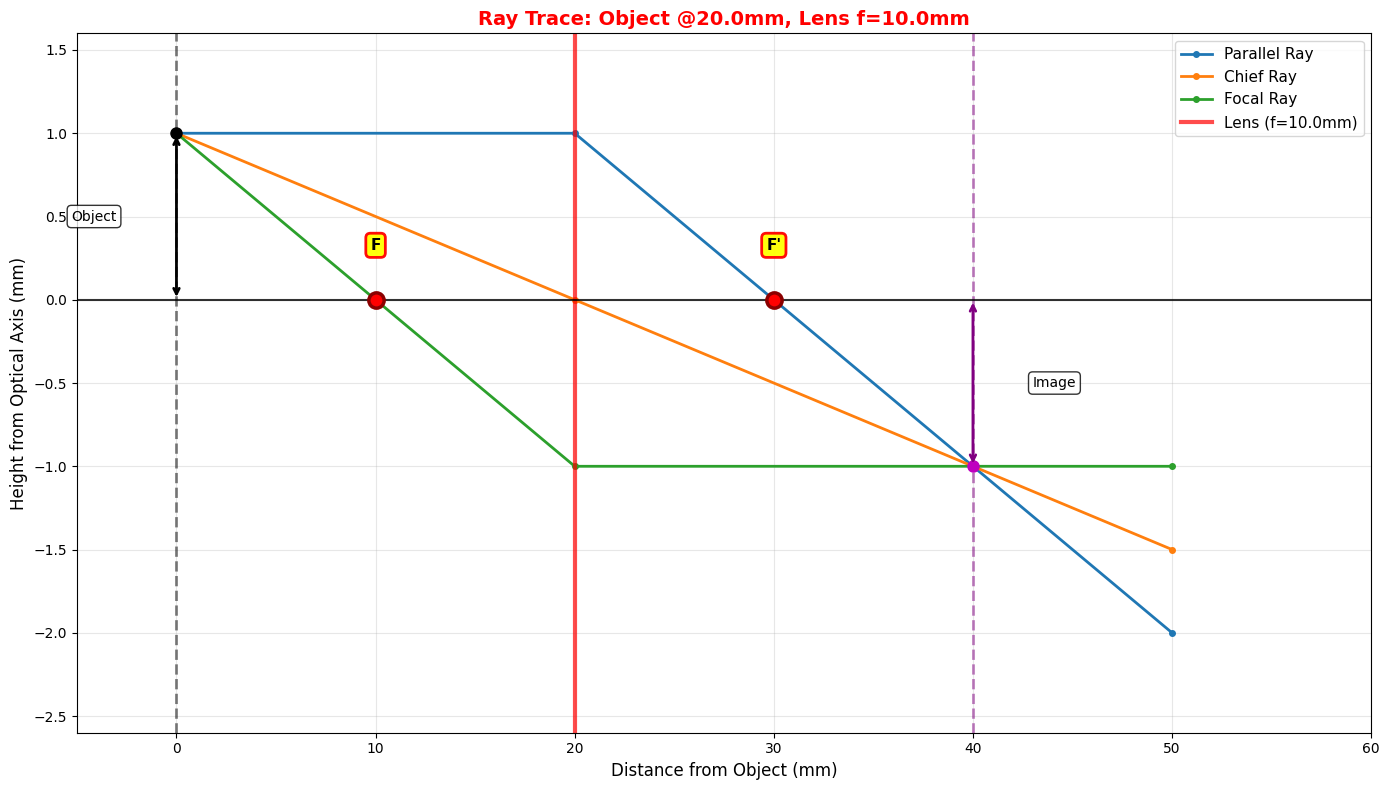

In [21]:
# This was run with a separate liubrary file, it won't run without it. I've included the image in my submission

import sys
sys.path.insert(0, r'C:\Users\logan\Desktop\Repos\ecen661')

# Force reload of the module to pick up changes
if 'optical_ray_tracer' in sys.modules:
    del sys.modules['optical_ray_tracer']

from optical_ray_tracer import OpticalSystem, plot_optical_system, analyze_system

# Problem parameters for HW1
object_height = 1.0  # mm
object_distance = 20.0  # mm
focal_length = 10.0  # mm

# Create optical system using standard add functions
system = OpticalSystem()
system.add_free_space(object_distance)  # Object to lens
system.add_lens(focal_length)  # Thin lens

# Calculate image position and extend the system
u = object_distance
f = focal_length
v = (u * f) / (u - f)  # Image distance from lens
system.add_free_space(abs(v) + 10)  # Beyond image for visualization


# Analyze the system
analysis = analyze_system(system, object_height, object_distance, focal_length)

# Create the plot with all three ray types
fig, ax = plot_optical_system(system, object_height, object_distance, focal_length,
                              title=f"Ray Trace: Object @{object_distance}mm, Lens f={focal_length}mm")
plt.tight_layout()
plt.show()

<div style="border:4px solid red">

**HW2:** An optical system is designed with two lenses.  The first lens is biconvex with a focal length of f=20mm and a diameter of 20mm.  The second lens is biconcave with a focal length of f=-20mm and a diameter of 40mm.  The separation of the lenses is 20mm.  A 10mm aperture is placed 30mm in front of the first lens.  A 20mm tall object is located 60mm in front of the first lenses.  

![F1](lens_design.jpg)

Assume that all light that does not pass through each lens is blocked.  The aperture is shown as the black box around the lens system.   Assume that the paraxial approximation is valid.

a.	What is the location of the image? Name the variable hw4_2.  It m,ust be referenced from the location of the object.  Positive it to the right if the object and negative is to the left of the object.



In [22]:
# Code for HW 2 - Image location using ABCD matrices

# System parameters
object_distance = 60  # mm
aperture_distance = 30  # mm
f1 = 20  # mm (biconvex)
lens_separation = 20  # mm
f2 = -20  # mm (biconcave)
object_height = 20  # mm

# Define ABCD matrices for each element
M1 = np.array([[1.0, object_distance], [0.0, 1.0]])  # Free space to first lens
M2 = np.array([[1.0, 0.0], [-1/f1, 1.0]])  # Lens 1
M3 = np.array([[1.0, lens_separation], [0.0, 1.0]])  # Free space between lenses
M4 = np.array([[1.0, 0.0], [-1/f2, 1.0]])  # Lens 2

# Two rays from top of object with different angles
ray_a = np.array([[object_height], [0.0]])  # Parallel ray
ray_b = np.array([[object_height], [-0.1]])  # Ray with angle

# Propagate rays through the system
ray_a_final = M4 @ M3 @ M2 @ M1 @ ray_a
ray_b_final = M4 @ M3 @ M2 @ M1 @ ray_b

print("Ray A after system:", ray_a_final)
print("Ray B after system:", ray_b_final)

# Find image location: distance where both rays have same height
# y_final = y + theta * d_image
# Solve: a_y + a_theta * d = b_y + b_theta * d
d_image = (ray_a_final[0, 0] - ray_b_final[0, 0]) / (ray_b_final[1, 0] - ray_a_final[1, 0])

# Image location from object
hw4_2 = object_distance + lens_separation + d_image

print(f"\nImage distance from 2nd lens: {d_image:.2f} mm")
print(f"Image location from object: hw4_2 = {hw4_2:.2f} mm")

Ray A after system: [[-1.11022302e-15]
 [-1.00000000e+00]]
Ray B after system: [[-2. ]
 [-0.9]]

Image distance from 2nd lens: 20.00 mm
Image location from object: hw4_2 = 100.00 mm


<div style="border:4px solid red">

**HW3:** Using the same optical system.  

b.	What is the size of the image?  Name the variable hw4_3.  Be sure to consider the sign.  A positive value means that the image is upright and a negative means that the image is inverted.  

In [23]:
#Code for HW 3

# Calculate magnification using final ray height
M5 = np.array([[1.0, d_image], [0.0, 1.0]])  # Free space to image
ray_a_image = M5 @ ray_a_final

# Image height (magnification)
hw4_3 = ray_a_image[0, 0]

print(f"Image height: hw4_3 = {hw4_3:.2f} mm")

Image height: hw4_3 = -20.00 mm


<div style="border:4px solid red">

**HW4:** Using the same optical system.  

What fractional height of lens 1 has rays from the image passing through it? Name the variable hw4_4.  Be sure to include the entire object not just the top of the image.

In [24]:
#Code for HW 4

# Given object heights from every point along the object, the whole lens will ahve at least some rays from the opbject, though not all points on the lens will receive rays from every point on the object.
# For example, the top of the object will send rays only to the bottom half of the lens.
# Likewise, the bottom of the object will send rays only to the top hald of the lens.

hw4_4 = 1.0

<div style="border:4px solid red">

**HW5:** Using the same optical system.  

What fractional height of lens 2 has rays from the image passing through it? Name the variable hw4_5.  Be sure to include the entire object not just the top of the image.

In [25]:
#Code for HW 5
lens2_diameter = 40.0
# Low case: Top of object facing downward
low_ray = np.array([[20],[-30/60]])

# High case: Bottom of object facing upward
high_ray = np.array([[0],[10/60]])

low_ray_result = M3 @ M2 @ M1 @ low_ray
high_ray_result = M3 @ M2 @ M1 @ high_ray

low_ray_height = low_ray_result[0,0]
high_ray_height = high_ray_result[0,0]

print(f"Low ray height at lens: {low_ray_height:.2f} mm")
print(f"High ray height at lens: {high_ray_height:.2f} mm")

hw4_5 = abs(high_ray_height - low_ray_height) / lens2_diameter

print(f"hw4_5 = {hw4_5:.4f}")

Low ray height at lens: -10.00 mm
High ray height at lens: 3.33 mm
hw4_5 = 0.3333


<div style="border:4px solid red">

**HW6:** You are tasked with designing an optical system for a slide projector that produces an upright, real image of a slide on a screen using only ideal thin lenses. No mirrors, prisms, or image-erecting optics are allowed.

The projector must meet the following specifications:
- Slide (object) height: $h_o = 2.0\ \text{cm}$
- Desired image height on the screen:  $h_i = 1.0\ \text{m}$
- Distance from the final lens to the screen:  $L = 3.0\ \text{m}$

The image formed on the screen must be: Real  and Upright (same orientation as the slide)

The solution should be two variables: 
(1) variable name: hw4_6A, type: numpy array, contents: position and focal lengths from object to image
(2) variable name: hw4_6B, type: string list, contents: 'z' for distance and 'f' for lens focal length

Summary of requiments.
- (1) The last element in hw4_6A should be 3.
- (2) The last element in hw4_6B should be 'z'.
- (3) With an input the ray vector of np.array([[0.02], [0]]) the output vector should have a top element of 1.
- (4) With an input the ray vector of np.array([[0.02], [0.1]]) the output vector should have a top element of 1.



In [26]:
#Code for HW 6

# Requirements:
# - Object height: 2 cm = 0.02 m
# - Image height: 1 m
# - Distance from final lens to screen: 3 m
# - Magnification: 1.0 / 0.02 = 50x
# - Real and upright image

# Strategy: Use two lenses to achieve upright real image
# Lens 1 creates inverted intermediate image
# Lens 2 re-inverts to create upright final image at screen

# Magnification = 50, so if M1*M2 = 50 and both inverted,
# we need each lens to contribute to magnification

# Using conjugate equation: 1/s_o + 1/s_i = 1/f
# For upright real image with two lenses:
# M_total = M1 * M2 = 50 (both negative for inversions = positive overall)

# Design: Place lenses to create intermediate image, then re-image to screen
object_height = 0.02  # m
image_height = 1.0   # m
final_distance = 3.0  # m to screen
magnification = image_height / object_height  # = 50

# For two-lens system creating upright real image:
# Try M1 = -5 (inverted), M2 = -10 (re-inverted)
# This gives total M = 50 upright

# Lens 1: f1 = 0.1 m (focal length in meters)
# Place object at s_o1 such that M1 = -5
# M1 = -s_i1/s_o1 = -5, so s_i1 = 5*s_o1
# 1/s_o1 + 1/(5*s_o1) = 1/0.1
# 1.2/s_o1 = 10, so s_o1 = 0.12 m

s_o1 = 0.12  # m
f1 = 0.1  # m
s_i1 = 1 / (1/f1 - 1/s_o1)
M1 = -s_i1 / s_o1

print(f"Lens 1: f={f1}, s_o={s_o1}, s_i={s_i1}, M1={M1}")

# Lens 2: Need to re-magnify by 10x and re-invert
# M2 = -10, so s_i2 = 10*s_o2
# Distance between lenses: d = s_i1 + s_o2
# We need s_i2 = final_distance = 3 m

s_i2 = final_distance  # 3 m
# M2 = -10, so s_o2 = s_i2 / 10 = 0.3 m
s_o2 = s_i2 / 10
f2 = 1 / (1/s_o2 + 1/s_i2)

d_between = s_i1 + s_o2

M2 = -s_i2 / s_o2

print(f"Lens 2: f={f2}, s_o={s_o2}, s_i={s_i2}, M2={M2}")
print(f"Distance between lenses: {d_between}")
print(f"Total magnification: {M1 * M2}")

# Construct ABCD system
# Element 1: Free space from object to lens 1
M_free1 = np.array([[1.0, s_o1], [0.0, 1.0]])

# Element 2: Lens 1
M_lens1 = np.array([[1.0, 0.0], [-1/f1, 1.0]])

# Element 3: Free space from lens 1 to lens 2
M_free2 = np.array([[1.0, d_between], [0.0, 1.0]])

# Element 4: Lens 2
M_lens2 = np.array([[1.0, 0.0], [-1/f2, 1.0]])

# Element 5: Free space from lens 2 to screen
M_free3 = np.array([[1.0, final_distance], [0.0, 1.0]])

# Test ray 1: height 0.02, angle 0
ray1 = np.array([[0.02], [0.0]])
result1 = M_free3 @ M_lens2 @ M_free2 @ M_lens1 @ M_free1 @ ray1

# Test ray 2: height 0.02, angle 0.1
ray2 = np.array([[0.02], [0.1]])
result2 = M_free3 @ M_lens2 @ M_free2 @ M_lens1 @ M_free1 @ ray2

print(f"\nTest Ray 1 output height: {result1[0, 0]:.4f} m")
print(f"Test Ray 2 output height: {result2[0, 0]:.4f} m")

# Build output arrays
hw4_6A = np.array([s_o1, f1, d_between, f2, final_distance])
hw4_6B = ['z', 'f', 'z', 'f', 'z']

print(f"\nhw4_6A = {hw4_6A}")
print(f"hw4_6B = {hw4_6B}")
print(f"\nLast element of hw4_6A: {hw4_6A[-1]} (should be 3)")
print(f"Last element of hw4_6B: {hw4_6B[-1]} (should be 'z')")

Lens 1: f=0.1, s_o=0.12, s_i=0.6000000000000002, M1=-5.000000000000002
Lens 2: f=0.2727272727272727, s_o=0.3, s_i=3.0, M2=-10.0
Distance between lenses: 0.9000000000000001
Total magnification: 50.000000000000014

Test Ray 1 output height: 1.0000 m
Test Ray 2 output height: 1.0000 m

hw4_6A = [0.12       0.1        0.9        0.27272727 3.        ]
hw4_6B = ['z', 'f', 'z', 'f', 'z']

Last element of hw4_6A: 3.0 (should be 3)
Last element of hw4_6B: z (should be 'z')
